In [96]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy import stats

In [20]:
data = json.load(open('acndata_sessions(1).json'))

In [21]:
df = pd.DataFrame(data["_items"])

In [22]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,60cbe90ef9af8b207905e60d,0039,"Wed, 02 Jun 2021 02:30:41 GMT","Wed, 02 Jun 2021 03:53:12 GMT","Wed, 02 Jun 2021 03:02:02 GMT",0.816,2_39_139_28_2021-06-02 02:30:40.573850,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None
1,60cbe90ef9af8b207905e60e,0039,"Wed, 02 Jun 2021 03:11:42 GMT","Wed, 02 Jun 2021 04:17:55 GMT",None,49.072,2_39_81_4550_2021-06-02 03:11:17.513917,0002,11900388,2-39-81-4550,America/Los_Angeles,000009741,"[{'WhPerMile': 258, 'kWhRequested': 25.8, 'mil..."
2,60cbe90ef9af8b207905e60f,0039,"Wed, 02 Jun 2021 04:40:35 GMT","Wed, 02 Jun 2021 06:18:15 GMT","Wed, 02 Jun 2021 06:18:02 GMT",10.668,2_39_79_383_2021-06-02 04:40:35.114311,0002,CA-492,2-39-79-383,America/Los_Angeles,000001470,"[{'WhPerMile': 284, 'kWhRequested': 28.4, 'mil..."
3,60cd3a8ff9af8b228751eab0,0039,"Wed, 02 Jun 2021 14:43:00 GMT","Wed, 02 Jun 2021 15:31:18 GMT","Wed, 02 Jun 2021 15:23:37 GMT",1.888,2_39_125_21_2021-06-02 14:42:33.185464,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
4,60cd3a8ff9af8b228751eab1,0039,"Wed, 02 Jun 2021 15:22:50 GMT","Wed, 02 Jun 2021 15:43:01 GMT",None,11.590,2_39_81_4550_2021-06-02 15:22:26.301751,0002,11900388,2-39-81-4550,America/Los_Angeles,000009561,"[{'WhPerMile': 299, 'kWhRequested': 38.87, 'mi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,60f3769cf9af8b5d8686697c,0039,"Thu, 01 Jul 2021 21:28:42 GMT","Thu, 01 Jul 2021 23:06:25 GMT",None,60.148,2_39_81_4550_2021-07-01 21:28:27.706772,0002,11900388,2-39-81-4550,America/Los_Angeles,000004903,"[{'WhPerMile': 258, 'kWhRequested': 82.56, 'mi..."
443,60f3769cf9af8b5d8686697d,0039,"Thu, 01 Jul 2021 21:39:33 GMT","Thu, 01 Jul 2021 22:11:12 GMT","Thu, 01 Jul 2021 22:11:07 GMT",1.745,2_39_139_28_2021-07-01 21:39:22.327346,0002,CA-303,2-39-139-28,America/Los_Angeles,000015855,"[{'WhPerMile': 283, 'kWhRequested': 2.83, 'mil..."
444,60f3769cf9af8b5d8686697e,0039,"Thu, 01 Jul 2021 22:20:35 GMT","Thu, 01 Jul 2021 23:35:43 GMT","Thu, 01 Jul 2021 23:05:30 GMT",2.196,2_39_125_21_2021-07-01 22:20:24.317872,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
445,60f3769cf9af8b5d8686697f,0039,"Thu, 01 Jul 2021 23:12:03 GMT","Thu, 01 Jul 2021 23:45:52 GMT",None,16.412,2_39_81_4550_2021-07-01 23:11:55.190948,0002,11900388,2-39-81-4550,America/Los_Angeles,000009307,"[{'WhPerMile': 301, 'kWhRequested': 45.15, 'mi..."


In [23]:
connect_time = []

for i in range(0,len(df['connectionTime'])):
    connect_time.append(df['connectionTime'][i][17:25])

In [24]:
disconnect_time = []

for i in range(0,len(df['disconnectTime'])):
    disconnect_time.append(df['disconnectTime'][i][17:25])

In [25]:
done_charging = []

for i in range(0,len(df['doneChargingTime'])):
    if df['doneChargingTime'][i] != None:
        done_charging.append(df['doneChargingTime'][i][17:25])
    else:
        done_charging.append(None)

In [26]:
done_charging_dt = pd.to_datetime(done_charging)

In [27]:
done_charging_dt

DatetimeIndex(['2021-11-30 03:02:02',                 'NaT',
               '2021-11-30 06:18:02', '2021-11-30 15:23:37',
                               'NaT', '2021-11-30 19:25:23',
               '2021-11-30 18:38:14', '2021-11-30 19:51:04',
               '2021-11-30 00:28:58', '2021-11-30 16:52:32',
               ...
                               'NaT', '2021-11-30 21:55:25',
                               'NaT', '2021-11-30 21:54:16',
               '2021-11-30 22:30:38',                 'NaT',
               '2021-11-30 22:11:07', '2021-11-30 23:05:30',
                               'NaT', '2021-11-30 23:58:36'],
              dtype='datetime64[ns]', length=447, freq=None)

In [28]:
connect_time_dt = pd.to_datetime(connect_time)

In [29]:
connect_time_dt

DatetimeIndex(['2021-11-30 02:30:41', '2021-11-30 03:11:42',
               '2021-11-30 04:40:35', '2021-11-30 14:43:00',
               '2021-11-30 15:22:50', '2021-11-30 15:45:54',
               '2021-11-30 15:47:45', '2021-11-30 15:55:01',
               '2021-11-30 16:05:19', '2021-11-30 16:07:03',
               ...
               '2021-11-30 17:57:44', '2021-11-30 19:53:08',
               '2021-11-30 20:01:53', '2021-11-30 20:06:06',
               '2021-11-30 20:41:34', '2021-11-30 21:28:42',
               '2021-11-30 21:39:33', '2021-11-30 22:20:35',
               '2021-11-30 23:12:03', '2021-11-30 23:29:09'],
              dtype='datetime64[ns]', length=447, freq=None)

In [30]:
disconnect_time_dt = pd.to_datetime(disconnect_time)

In [31]:
charging_time = disconnect_time_dt - connect_time_dt

In [32]:
df['chargingTime'] = charging_time

In [33]:
df['disconnectTime'][11]

'Thu, 03 Jun 2021 00:05:44 GMT'

In [34]:
df['connectionTime'][11]

'Wed, 02 Jun 2021 21:11:20 GMT'

In [35]:
df['chargingTime'].max()

Timedelta('0 days 09:10:07')

In [36]:
# df['overchargeTime'].max()

In [37]:
overcharge_time = []

for i in range(0, len(done_charging_dt)):
    if done_charging_dt[i] != None:
        overcharge_time.append(disconnect_time_dt[i] - done_charging_dt[i])
    else:
        overcharge_time.append(None)

In [38]:
df['overchargeTime'] = overcharge_time

In [39]:
86400 + (df['overchargeTime'].astype('timedelta64[s]')[11])

1374.0

In [40]:
df['overchargeTime'][11]

Timedelta('-1 days +00:22:54')

In [41]:
overcharge_sec = []

for i in range(0,len(df['overchargeTime'].astype('timedelta64[D]'))):
    if (df['overchargeTime'].astype('timedelta64[D]')[i]) == -1.0:
        overcharge_sec.append((86400 + (df['overchargeTime'].astype('timedelta64[s]')[i])))
    else:
        overcharge_sec.append(df['overchargeTime'].astype('timedelta64[s]')[i])


#df['overchargeTime'].astype('timedelta64[D]')

In [42]:
df['overchargeTime (seconds)'] = overcharge_sec

In [43]:
df['overchargeTime (seconds)'].max()

86342.0

In [44]:
import datetime

str(datetime.timedelta(seconds=df['overchargeTime (seconds)'].max()))

'23:59:02'

In [45]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,chargingTime,overchargeTime,overchargeTime (seconds)
0,60cbe90ef9af8b207905e60d,0039,"Wed, 02 Jun 2021 02:30:41 GMT","Wed, 02 Jun 2021 03:53:12 GMT","Wed, 02 Jun 2021 03:02:02 GMT",0.816,2_39_139_28_2021-06-02 02:30:40.573850,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None,0 days 01:22:31,0 days 00:51:10,3070.0
1,60cbe90ef9af8b207905e60e,0039,"Wed, 02 Jun 2021 03:11:42 GMT","Wed, 02 Jun 2021 04:17:55 GMT",None,49.072,2_39_81_4550_2021-06-02 03:11:17.513917,0002,11900388,2-39-81-4550,America/Los_Angeles,000009741,"[{'WhPerMile': 258, 'kWhRequested': 25.8, 'mil...",0 days 01:06:13,NaT,NaN
2,60cbe90ef9af8b207905e60f,0039,"Wed, 02 Jun 2021 04:40:35 GMT","Wed, 02 Jun 2021 06:18:15 GMT","Wed, 02 Jun 2021 06:18:02 GMT",10.668,2_39_79_383_2021-06-02 04:40:35.114311,0002,CA-492,2-39-79-383,America/Los_Angeles,000001470,"[{'WhPerMile': 284, 'kWhRequested': 28.4, 'mil...",0 days 01:37:40,0 days 00:00:13,13.0
3,60cd3a8ff9af8b228751eab0,0039,"Wed, 02 Jun 2021 14:43:00 GMT","Wed, 02 Jun 2021 15:31:18 GMT","Wed, 02 Jun 2021 15:23:37 GMT",1.888,2_39_125_21_2021-06-02 14:42:33.185464,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 00:48:18,0 days 00:07:41,461.0
4,60cd3a8ff9af8b228751eab1,0039,"Wed, 02 Jun 2021 15:22:50 GMT","Wed, 02 Jun 2021 15:43:01 GMT",None,11.590,2_39_81_4550_2021-06-02 15:22:26.301751,0002,11900388,2-39-81-4550,America/Los_Angeles,000009561,"[{'WhPerMile': 299, 'kWhRequested': 38.87, 'mi...",0 days 00:20:11,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,60f3769cf9af8b5d8686697c,0039,"Thu, 01 Jul 2021 21:28:42 GMT","Thu, 01 Jul 2021 23:06:25 GMT",None,60.148,2_39_81_4550_2021-07-01 21:28:27.706772,0002,11900388,2-39-81-4550,America/Los_Angeles,000004903,"[{'WhPerMile': 258, 'kWhRequested': 82.56, 'mi...",0 days 01:37:43,NaT,NaN
443,60f3769cf9af8b5d8686697d,0039,"Thu, 01 Jul 2021 21:39:33 GMT","Thu, 01 Jul 2021 22:11:12 GMT","Thu, 01 Jul 2021 22:11:07 GMT",1.745,2_39_139_28_2021-07-01 21:39:22.327346,0002,CA-303,2-39-139-28,America/Los_Angeles,000015855,"[{'WhPerMile': 283, 'kWhRequested': 2.83, 'mil...",0 days 00:31:39,0 days 00:00:05,5.0
444,60f3769cf9af8b5d8686697e,0039,"Thu, 01 Jul 2021 22:20:35 GMT","Thu, 01 Jul 2021 23:35:43 GMT","Thu, 01 Jul 2021 23:05:30 GMT",2.196,2_39_125_21_2021-07-01 22:20:24.317872,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 01:15:08,0 days 00:30:13,1813.0
445,60f3769cf9af8b5d8686697f,0039,"Thu, 01 Jul 2021 23:12:03 GMT","Thu, 01 Jul 2021 23:45:52 GMT",None,16.412,2_39_81_4550_2021-07-01 23:11:55.190948,0002,11900388,2-39-81-4550,America/Los_Angeles,000009307,"[{'WhPerMile': 301, 'kWhRequested': 45.15, 'mi...",0 days 00:33:49,NaT,NaN


In [46]:
df['overchargeTime (hours)'] = (df['overchargeTime (seconds)'] / 3600)

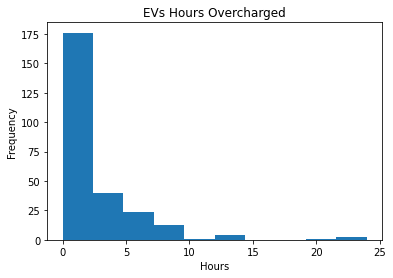

In [47]:
df['overchargeTime (hours)'].plot.hist()
plt.title('EVs Hours Overcharged')
plt.xlabel('Hours')
plt.show()

In [48]:
df['overchargeTime'].astype('timedelta64[s]')[11] + 86400

1374.0

In [49]:
df['chargingTime'].astype('timedelta64[s]')[11] +86400

10464.0

In [50]:
staytime = []

for i in range(0,len(df['chargingTime'].astype('timedelta64[D]'))):
    if (df['chargingTime'].astype('timedelta64[D]')[i]) == -1.0:
        staytime.append((86400 + (df['chargingTime'].astype('timedelta64[s]')[i])))
    else:
        staytime.append(df['chargingTime'].astype('timedelta64[s]')[i])


In [51]:
df['Stay Time (seconds)'] = staytime

In [52]:
df['Stay Time (hours)'] = (df['Stay Time (seconds)'] / 3600)

In [53]:
df['overchargeTime (hours)'].max()

23.983888888888888

In [127]:
max_stay_time = df['Stay Time (hours)'].max()
max_stay_time

18.72138888888889

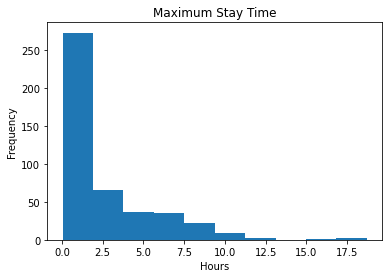

In [55]:
df['Stay Time (hours)'].plot.hist()
plt.title('Maximum Stay Time')
plt.xlabel('Hours')
plt.show()

In [56]:
df['userInputs'][1]

[{'WhPerMile': 258,
  'kWhRequested': 25.8,
  'milesRequested': 100,
  'minutesAvailable': 480,
  'modifiedAt': 'Wed, 02 Jun 2021 03:11:42 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Wed, 02 Jun 2021 11:11:42 GMT',
  'userID': 9741}]

In [57]:
df['chargingTime'][1]

Timedelta('0 days 01:06:13')

In [75]:
df['Stay Time (hours)']

0      1.375278
1      1.103611
2      1.627778
3      0.805000
4      0.336389
         ...   
442    1.628611
443    0.527500
444    1.252222
445    0.563611
446    0.492778
Name: Stay Time (hours), Length: 447, dtype: float64

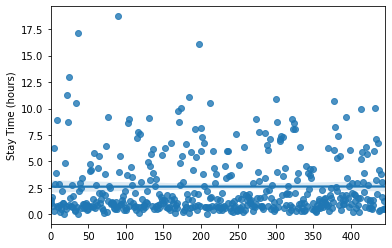

In [122]:
import seaborn as sns
df['Stay Time (hours)']
x = df['Stay Time (hours)'].keys()
y = df['Stay Time (hours)']
sns.regplot(x= x,y= y)
plt.show()


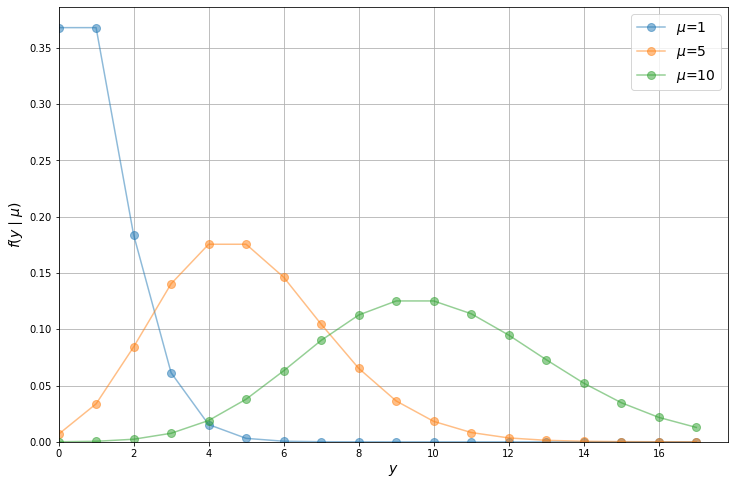

In [129]:
from scipy.special import factorial
from numpy import exp

poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, int(max_stay_time))

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [110]:
res = model.resid
standard_dev = np.std(res)
standard_dev 

129.03726098391857

In [111]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
    # extract parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 2806.7307641925563
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.0949398e-05, 0.0000000e+00, 9.0949398e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 140
      nit: 34
     njev: 35
   status: 0
  success: True
        x: array([2.22794519e+02, 7.88727731e-02, 1.29038823e+02])

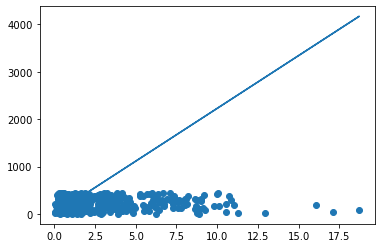

In [121]:
plt.scatter(x,y)
plt.plot(x, mle_model['x'][0] * x + mle_model['x'][1])
plt.show()